# Data Analysis with Python
We will be using a dataset about cars from back in 1985. This data set consists of three types of entities:  
- the specification of an auto in terms of various characteristics,
- its assigned insurance risk rating,
- its normalized losses in use as compared to other cars.  

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe. The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/specialty, etc…), and represents the average loss per car per year.

#### Attribute Information:
    symboling: -3, -2, -1, 0, 1, 2, 3
    normalized-losses: continuous from 65 to 256
    make: alfa-romero, audi, bmw, chevrolet, dodge, honda, isuzu, jaguar, mazda, mercedes-benz, mercury, mitsubishi, nissan, peugot, plymouth, porsche, renault, saab, subaru, toyota, volkswagen, volvo
    fuel-type: diesel, gas
    aspiration: std, turbo
    num-of-doors: four, two
    body-style: hardtop, wagon, sedan, hatchback, convertible
    drive-wheels: 4wd, fwd, rwd
    engine-location: front, rear
    wheel-base: continuous from 86.6 120.9
    length: continuous from 141.1 to 208.1
    width: continuous from 60.3 to 72.3
    height: continuous from 47.8 to 59.8
    curb-weight: continuous from 1488 to 4066
    engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor
    num-of-cylinders: eight, five, four, six, three, twelve, two
    engine-size: continuous from 61 to 326
    fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi
    bore: continuous from 2.54 to 3.94
    stroke: continuous from 2.07 to 4.17
    compression-ratio: continuous from 7 to 23
    horsepower: continuous from 48 to 288
    peak-rpm: continuous from 4150 to 6600
    city-mpg: continuous from 13 to 49
    highway-mpg: continuous from 16 to 54
    price: continuous from 5118 to 45400.


## Data Acquisition

In [157]:
import pandas as pd
import numpy as np

# read the online file and assign it to the variable 'df'
path = 'imports-85.data'
df = pd.read_csv(path, header=None)

# print the first 10 rows of the dataset
print('The first 10 rows of the dataframe')
df.head(10)

The first 10 rows of the dataframe


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


In [158]:
# create headers list
headers = ["symboling","normalized-losses","make","fuel-type","aspiration", "num-of-doors","body-style",
         "drive-wheels","engine-location","wheel-base", "length","width","height","curb-weight","engine-type",
         "num-of-cylinders", "engine-size","fuel-system","bore","stroke","compression-ratio","horsepower",
         "peak-rpm","city-mpg","highway-mpg","price"]
print("headers\n", headers)

headers
 ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']


In [159]:
# replace the headers in the dataframe
df.columns = headers

In [160]:
# view the data types
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [161]:
# get a statistical summary of each column
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


In [162]:
df.describe(include='all')

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205,205,205.000000,205,205,205.000000,205.000000,205
unique,NaN,52,22,2,2,3,5,3,2,NaN,...,NaN,8,39,37,NaN,60,24,NaN,NaN,187
top,NaN,?,toyota,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,3.62,3.40,NaN,68,5500,NaN,NaN,?
freq,NaN,41,32,185,168,114,96,120,202,NaN,...,NaN,94,23,20,NaN,19,37,NaN,NaN,4
mean,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,NaN,NaN,10.142537,NaN,NaN,25.219512,30.751220,NaN
std,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,NaN,NaN,3.972040,NaN,NaN,6.542142,6.886443,NaN
min,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,NaN,NaN,7.000000,NaN,NaN,13.000000,16.000000,NaN
25%,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,NaN,NaN,8.600000,NaN,NaN,19.000000,25.000000,NaN
50%,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,NaN,NaN,9.000000,NaN,NaN,24.000000,30.000000,NaN
75%,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,NaN,NaN,9.400000,NaN,NaN,30.000000,34.000000,NaN


In [163]:
# get the summary of specific columns
df[['length', 'compression-ratio']].describe()

,length,compression-ratio
count,205.000000,205.000000
mean,174.049268,10.142537
std,12.337289,3.972040
min,141.100000,7.000000
25%,166.300000,8.600000
50%,173.200000,9.000000
75%,183.100000,9.400000
max,208.100000,23.000000


In [164]:
# get a concise summary (top 30 & bottom 30 rows)
df.info

<bound method DataFrame.info of      symboling normalized-losses         make fuel-type aspiration  \
0            3                 ?  alfa-romero       gas        std   
1            3                 ?  alfa-romero       gas        std   
2            1                 ?  alfa-romero       gas        std   
3            2               164         audi       gas        std   
4            2               164         audi       gas        std   
..         ...               ...          ...       ...        ...   
200         -1                95        volvo       gas        std   
201         -1                95        volvo       gas      turbo   
202         -1                95        volvo       gas        std   
203         -1                95        volvo    diesel      turbo   
204         -1                95        volvo       gas      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd      

## Data Wrangling
Data Wrangling is the process of converting data from the initial format to a format that may be better for analysis.

In [165]:
# replace "?" with NaN
df.replace('?', np.nan, inplace=True)

In [166]:
# identify the missing data
# use ".isnull()" or ".notnull()"
missing_data = df.isnull() # True stands for missing value
missing_data.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True


In [167]:
# count the missing values in each column
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

symboling
False    205
Name: symboling, dtype: int64

normalized-losses
False    164
True      41
Name: normalized-losses, dtype: int64

make
False    205
Name: make, dtype: int64

fuel-type
False    205
Name: fuel-type, dtype: int64

aspiration
False    205
Name: aspiration, dtype: int64

num-of-doors
False    203
True       2
Name: num-of-doors, dtype: int64

body-style
False    205
Name: body-style, dtype: int64

drive-wheels
False    205
Name: drive-wheels, dtype: int64

engine-location
False    205
Name: engine-location, dtype: int64

wheel-base
False    205
Name: wheel-base, dtype: int64

length
False    205
Name: length, dtype: int64

width
False    205
Name: width, dtype: int64

height
False    205
Name: height, dtype: int64

curb-weight
False    205
Name: curb-weight, dtype: int64

engine-type
False    205
Name: engine-type, dtype: int64

num-of-cylinders
False    205
Name: num-of-cylinders, dtype: int64

engine-size
False    205
Name: engine-size, dtype: int64

fuel-system
Fa

In this dataset, none of the columns are empty enough to drop entirely.

**Replace by mean:**  
"normalized-losses": 41 missing data, replace them with mean  
"bore": 4 missing data, replace them with mean  
"stroke": 4 missing data, replace them with mean  
"horsepower": 2 missing data, replace them with mean  
"peak-rpm": 2 missing data, replace them with mean

**Replace by frequency:**  
"num-of-doors": 2 missing data, replace them with "four"  
Reason: 84% sedans are four-door. Since four doors is most frequent, it is most likely to occur

**Drop the whole row:**  
"price": 4 missing data, simply delete the whole row  
Reason: Price is what we want to predict. Any data entry without price data cannot be used for prediction; therefore any row now without price data is not useful to us.

##### Replace by mean

In [168]:
# normalized-losses column
# calculate average of the column. astype('float') saves the mean value in float dtype.
avg_norm_loss = df['normalized-losses'].astype('float').mean(axis=0)
print('Average of normalized-losses:', avg_norm_loss)

Average of normalized-losses: 122.0


In [169]:
# normalized-losses column
# replace NaN by the mean value
df['normalized-losses'].replace(np.nan, avg_norm_loss, inplace=True)

In [170]:
# bore column
# calculate average of the column. astype('float') saves the mean value in float dtype.
avg_bore = df['bore'].astype('float').mean(axis=0)
print('Average of bore:', avg_bore)

Average of bore: 3.3297512437810957


In [171]:
# bore column
# replace NaN by the mean value
df['bore'].replace(np.nan, avg_norm_loss, inplace=True)

In [172]:
# stroke column
# calculate average of the column. astype('float') saves the mean value in float dtype.
avg_stroke = df['stroke'].astype('float').mean(axis=0)
print('Average of stroke:', avg_stroke)

Average of stroke: 3.2554228855721337


In [173]:
# stroke column
# replace NaN by the mean value
df['stroke'].replace(np.nan, avg_stroke, inplace=True)

In [174]:
# horsepower column
# calculate average of the column. astpye('float') saves the mean value in flaot dtype
avg_hp = df['horsepower'].astype('float').mean(axis=0)
print('Average of horsepower: ', avg_hp)

Average of horsepower:  104.25615763546799


In [175]:
# horsepower column
# replace NaN by the ean value
df['horsepower'].replace(np.nan, avg_hp, inplace=True)

In [176]:
# peak-rpm column
# calculate average of the column. astype('float') saves the mean value in float dtype.
avg_peakrpm = df['peak-rpm'].astype('float').mean(axis=0)
print('Average of peak-rpm:', avg_peakrpm)

Average of peak-rpm: 5125.369458128079


In [177]:
# peak-rpm column
# replace NaN by the mean value
df['peak-rpm'].replace(np.nan, avg_peakrpm, inplace=True)

##### Replace by Frequency

In [178]:
# identify which values are present in a particular column
df['num-of-doors'].value_counts()

four    114
two      89
Name: num-of-doors, dtype: int64

In [179]:
# use the ".idxmax()" method to calculate for us the most common type automatically
df['num-of-doors'].value_counts().idxmax()

'four'

In [180]:
# replace the missing 'num-of-doors' values by the most frequent
df['num-of-doors'].replace(np.nan, 'four', inplace=True)

##### Drop the whole row

In [181]:
df.dropna(subset=['price'], axis=0, inplace=True)

In [182]:
# reset the index because we dropped rows
df.reset_index(drop=True, inplace=True)
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [183]:
# check the data types
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [184]:
# convert the data types into proper format
# use double brackets when including multiple columns in one statement
df[['bore', 'stroke', 'price', 'peak-rpm', 'horsepower']] = df[['bore', 'stroke', 'price', 'peak-rpm', 'horsepower']].astype('float')
df['normalized-losses'] = df['normalized-losses'].astype('int')

In [185]:
df.dtypes

symboling              int64
normalized-losses      int32
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Data Normalization
Normalization is the process of transforming values of several variables into a similar range. Typical normalizations include scaling the variable so the variable average is 0, scaling the variable so the variance is 1, or scaling variable so the variable values range from 0 to 1.

In [186]:
# scale the columns 'length', 'width' and 'height'
# replace (original value) by (original value)/(maximum value)
df['length'] = df['length']/df['length'].max()
df['width'] = df['width']/df['width'].max()
df['height'] = df['height']/df['height'].max()

df[['length', 'width', 'height']].head()

,length,width,height
0,0.811148,0.890278,0.816054
1,0.811148,0.890278,0.816054
2,0.822681,0.909722,0.876254
3,0.848630,0.919444,0.908027
4,0.848630,0.922222,0.908027


### Binning
Binning is a process of transforming continuous numerical variables into discrete categorical 'bins', for grouped analysis.

In [187]:
df['horsepower'].describe()

count    201.000000
mean     103.405534
std       37.365700
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      262.000000
Name: horsepower, dtype: float64

In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it has 58 unique values. What if we only care about the price difference between cars with high horsepower, medium horsepower, and little horsepower (3 types)?

Text(0.5, 1.0, 'horsepower bins')

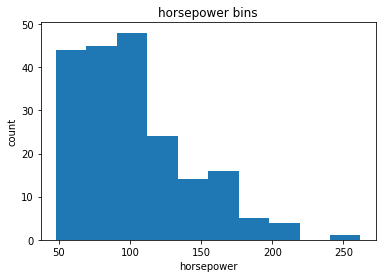

In [188]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
plt.pyplot.hist(df["horsepower"])

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

In [189]:
bins = np.linspace(min(df['horsepower']), max(df['horsepower']), 4)
bins

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [190]:
# set the group names
group_names = ['low', 'medium', 'high']

In [191]:
df['horsepower-binned'] = pd.cut(df['horsepower'], bins, labels=group_names, include_lowest=True)
df[['horsepower', 'horsepower-binned']].head(10)

,horsepower,horsepower-binned
0,111.0,low
1,111.0,low
2,154.0,medium
3,102.0,low
4,115.0,low
5,110.0,low
6,110.0,low
7,110.0,low
8,140.0,medium
9,101.0,low


In [192]:
df['horsepower-binned'].value_counts()

low       153
medium     43
high        5
Name: horsepower-binned, dtype: int64

Text(0.5, 1.0, 'horsepower bins')

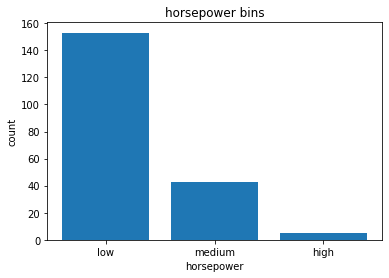

In [193]:
# plot the distribution
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
pyplot.bar(group_names, df["horsepower-binned"].value_counts())

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower bins")

#### Bins Visualization
Normally, a histogram is used to visualize the distribution of bins.

Text(0.5, 1.0, 'horsepower bins')

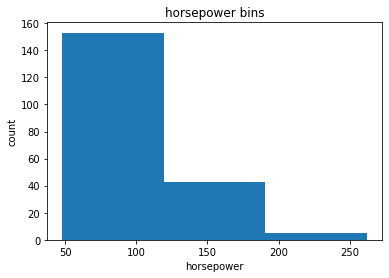

In [194]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot

a = (0, 1, 2)

# draw histogram of attribute 'horsepower' with bins=3
plt.pyplot.hist(df['horsepower'], bins=3)

# set x/y labels and plot title
plt.pyplot.xlabel('horsepower')
plt.pyplot.ylabel('count')
plt.pyplot.title('horsepower bins')

#### Indicator variable (or dummy variable)
An indicator variable (or dummy variable) is a numerical variable used to label categories. They are called 'dummies' because the numbers themselves don't have inherent meaning.

In [195]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

We see the column "fuel-type" has two unique values, "gas" or "diesel". Regression doesn't understand words, only numbers. To use this attribute in regression analysis, we convert "fuel-type" into indicator variables.

In [196]:
# assign numerical values to the different categories of 'fuel-tpye'
dummy_variable_1 = pd.get_dummies(df['fuel-type'])
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [197]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'horsepower-binned'],
      dtype='object')

In [198]:
# change column names for clarity
dummy_variable_1.rename(columns={'fuel-tpye-diesel':'gas', 'fuel-type-diesel':'diesel'}, inplace=True)
dummy_variable_1.head()

,diesel,gas
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [199]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price', 'horsepower-binned'],
      dtype='object')

We now have the value 0 to represent "gas" and 1 to represent "diesel" in the column "fuel-type".

In [200]:
# merge data frame 'df' and 'dummy_variable_1'
df = pd.concat([df, dummy_variable_1], axis=1)

# drop original column 'fuel-type' from 'df'
df.drop('fuel-type', axis=1, inplace=True)

The last two columns are now the indicator variable representation of the fuel-type variable. It's all 0s and 1s now.

In [201]:
# create indicator variable for the column 'aspiration'
dummy_variable_2 = pd.get_dummies(df['aspiration'])
dummy_variable_2.rename(columns={'std': 'aspiration-std', 'turbo': 'aspiration-turbo'}, inplace=True)
dummy_variable_2.head()

,aspiration-std,aspiration-turbo
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [202]:
# merge the new dataframe to the original dataframe
df = pd.concat([df, dummy_variable_2], axis=1)

# drop the column 'aspiration'
df.drop('aspiration', axis=1, inplace=True)

df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111.0,5000.0,21,27,13495.0,low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111.0,5000.0,21,27,16500.0,low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154.0,5000.0,19,26,16500.0,medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102.0,5500.0,24,30,13950.0,low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115.0,5500.0,18,22,17450.0,low,0,1,1,0


### Analyzing Individual Feature Patterns using Visualization

In [203]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#### Continuous numerical variables
Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.

#### Correlation
We can calculate the correlation between variables of type 'int64' or 'float64' using the method 'corr'.

In [204]:
df.corr() 

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,0.243521,-0.008153,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,0.124511,0.055045,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,-0.074380,0.158018,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,-0.050463,0.123952,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,-0.004059,0.188822,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,-0.240217,-0.060663,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,-0.029485,0.167438,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,-0.177698,0.205928,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,0.243521,0.124511,-0.074380,-0.050463,-0.004059,-0.240217,-0.029485,-0.177698,1.000000,-0.001549,-0.027237,0.032443,0.259276,-0.196827,-0.170635,0.005399,-0.046482,0.046482,0.062876,-0.062876
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.001549,1.000000,0.187871,0.098267,-0.063561,-0.033956,-0.034636,0.082269,0.241064,-0.241064,-0.218233,0.218233


In [205]:
# correlation between bore, stroke, compression-ratio and horspower
df[['bore', 'stroke', 'compression-ratio', 'horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.001549,-0.027237,0.032443
stroke,-0.001549,1.000000,0.187871,0.098267
compression-ratio,-0.027237,0.187871,1.000000,-0.214514
horsepower,0.032443,0.098267,-0.214514,1.000000


### Continuos numerical variables
Continuous numerical variables are variables that may contain any value within some range. Continuous numerical variables can have the type "int64" or "float64". A great way to visualize these variables is by using scatterplots with fitted lines.

##### Positive Linear Relationship

(0, 53229.620270856)

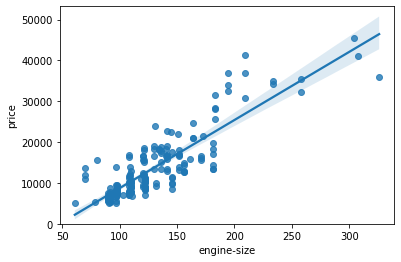

In [206]:
# engine size as potential predictor variable of price
sns.regplot(x='engine-size', y='price', data=df)
plt.ylim(0,)

As the engine-size goes up, the price goes up: this indicates a positive direct correlation between these two variables. Engine size seems like a pretty good predictor of price since the regression line is almost a perfect diagonal line.

In [207]:
# examine the correlation between 'engine-size' and 'price'
df[['engine-size', 'price']].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


As the highway-mpg goes up, the price goes down: this indicates an inverse/negative relationship between these two variables.

In [208]:
# examine the correlation between 'highway-mpg' and 'price'
df[['highway-mpg', 'price']].corr()

,highway-mpg,price
highway-mpg,1.000000,-0.704692
price,-0.704692,1.000000


##### Weak Linear Relationship

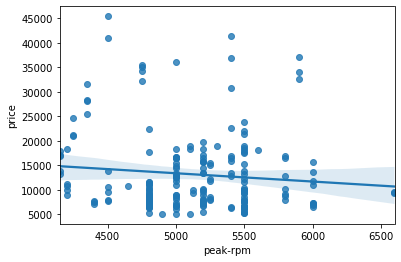

In [209]:
# relationship between peak-rpm and price
sns.regplot(x='peak-rpm', y='price', data=df)

Peak rpm does not seem like a good predictor of the price at all since the regression line is close to horizontal. Also, the data points are very scattered and far from the fitted line, showing lots of variability. Therefore it's it is not a reliable variable.

In [210]:
# examine the correlation between 'peak-rpm' and 'price 
df[['peak-rpm', 'price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


### Categorical variables
These are variables that describe a 'characteristic' of a data unit, and are selected from a small group of categories. The categorical variables can have the type "object" or "int64". A good way to visualize categorical variables is by using boxplots.

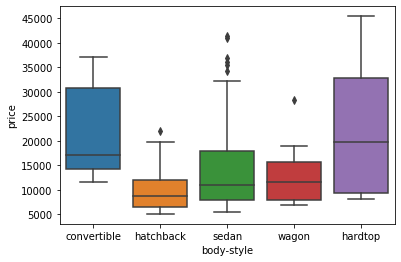

In [211]:
# relationship between body-style and price
sns.boxplot(x='body-style', y='price', data=df)

We see that the distributions of price between the different body-style categories have a significant overlap, and so body-style would not be a good predictor of price.

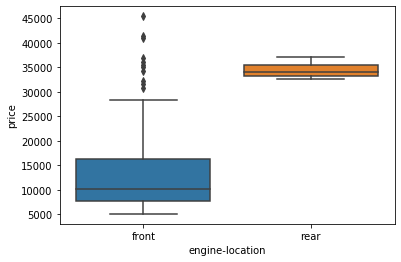

In [212]:
# relationship between engine location and price
sns.boxplot(x='engine-location', y='price', data=df)

We see that the distribution of price between these two engine-location categories, front and rear, are distinct enough to take engine-location as a potential good predictor of price.

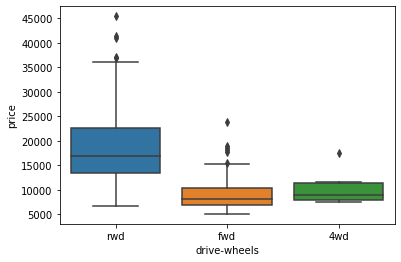

In [213]:
# relationship etween drive wheels and price
sns.boxplot(x='drive-wheels', y='price', data=df)

We see that the distribution of price between the different drive-wheels categories differs; as such, drive-wheels could potentially be a predictor of price.

### Descriptive Statistical Analysis
The **describe** function automatically computes basic statistics for all continuous variables. Any NaN values are automatically skipped in these statistics.

In [214]:
df.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,aspiration-std,aspiration-turbo
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,5.692289,3.256874,10.164279,103.405534,5117.665368,25.179104,30.686567,13207.129353,0.099502,0.900498,0.820896,0.179104
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,16.616706,0.316048,4.004965,37.365700,478.113805,6.423220,6.815150,7947.066342,0.300083,0.300083,0.384397,0.384397
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000,0.000000,1.000000,1.000000,0.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5125.369458,24.000000,30.000000,10295.000000,0.000000,1.000000,1.000000,0.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.600000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000,0.000000,1.000000,1.000000,0.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,122.000000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000


In [215]:
df.describe(include='object')

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system
count,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8
top,toyota,four,sedan,fwd,front,ohc,four,mpfi
freq,32,115,94,118,198,145,157,92


**value_counts** is a good way of understanding how many units of each characteristic/variable we have. The method "value_counts" only works on Pandas series, not Pandas Dataframes. As a result, we only include one bracket "df['drive-wheels']" not two brackets "df[['drive-wheels']]".

In [216]:
df['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [217]:
# convert the series to a dataframe
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [218]:
# rename the column 'drive-wheels' to 'value_counts'
drive_wheels_counts = df['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts

,value_counts
fwd,118
rwd,75
4wd,8


In [219]:
# rename the index to 'drive-wheels'
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


In [220]:
# value_counts for engine location
engine_loc_counts = df['engine-location'].value_counts().to_frame()
engine_loc_counts.rename({'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts

,engine-location
engine-location,
front,198
rear,3


The value counts of the engine location would not be a good predictor variable for the price. This is because we only have 3 cars with a rear engine and 198 with an engine in the front; this result is skewed. Thus, we are not able to draw any conclusions about the engine location.

### Grouping
The 'groupby' method groups data by different categories. The data is grouped based on one or several variables and analysis is performed on the individual groups.

In [221]:
# categories of drive wheels
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

If we want to know on average, which type of drive wheel is most valuable, we can group 'drive-wheels' and then average them.

In [222]:
# select columns and assign them to a variable
df_group_one = df[['drive-wheels', 'body-style', 'price']]

In [223]:
# grouping
# calculate the average price for each of the different categories of data
df_group_one = df_group_one.groupby(['drive-wheels'], as_index=False).mean()
df_group_one

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


It seems that rear-wheel drive vehicles are, on average, the most expensive, while 4-wheel drive and front-wheel drive are approximately the same price.

In [224]:
# grouping with multiple variables
df_gptest = df[['drive-wheels', 'body-style', 'price']]
grouped_test1 = df_gptest.groupby(['drive-wheels', 'body-style'], as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


This grouped data is much easier to visualize when it is made into a pivot table. A pivot table is like an Excel spreadsheet, with one variable along the column and another along the row. We can convert the dataframe to a pivot table using the method 'pivot' to create a pivot table from the groups.

In [225]:
# leave the drive-wheel variable as the rows and pivot body-style to become the columns of the table
grouped_pivot = grouped_test1.pivot(index='drive-wheels', columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

Often, we won't have data for some of the pivot cells. We can fill these missing cells with the value 0, but any other value could potentially be used as well.

In [226]:
# fill missing values with 0
grouped_pivot = grouped_pivot.fillna(0) 
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

In [227]:
# groupby to find  average price of each car based on body style
df_gptest_2 = df[['body-style', 'price']]
grouped_test_bodystyle = df_gptest_2.groupby(['body-style'], as_index=False).mean()
grouped_test_bodystyle

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


Use a heat map to visualize the relationship between Body Style vs Price

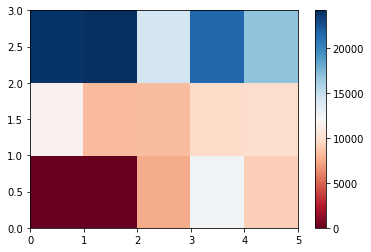

In [228]:
# use the grouped results
plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

The heatmap plots the target variable (price) proportional to colour with respect to the variables 'drive-wheel' and 'body-style' in the vertical and horizontal axis respectively. This allows us to visualize how the price is related to 'drive-wheel' and 'body-style'.

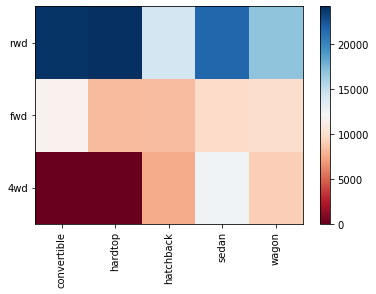

In [229]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

### Correlation and Causation
**Correlation**: a measure of the extent of interdependence between variables.

**Causation**: the relationship between cause and effect between two variables.

Correlation doesn't imply causation.

Persaon Correlation: It measures the linear dependence between two variables X and Y.

The resulting coefficient is a value between -1 and 1 inclusive, where:

*   1: Total positive linear correlation.
*   0: No linear correlation, the two variables most likely do not affect each other.
*   -1: Total negative linear correlation

Pearson Correlation is the default method of the function "corr". Like before we can calculate the Pearson Correlation of the 'int64' or 'float64' variables.



In [230]:
# calculate the Pearson coefficient
df.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,diesel,gas,aspiration-std,aspiration-turbo
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,0.243521,-0.008153,-0.182196,0.075819,0.279740,-0.035527,0.036233,-0.082391,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,0.124511,0.055045,-0.114713,0.217299,0.239543,-0.225016,-0.181877,0.133999,-0.101546,0.101546,0.006911,-0.006911
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,-0.074380,0.158018,0.250313,0.371147,-0.360305,-0.470606,-0.543304,0.584642,0.307237,-0.307237,-0.256889,0.256889
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,-0.050463,0.123952,0.159733,0.579821,-0.285970,-0.665192,-0.698142,0.690628,0.211187,-0.211187,-0.230085,0.230085
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,-0.004059,0.188822,0.189867,0.615077,-0.245800,-0.633531,-0.680635,0.751265,0.244356,-0.244356,-0.305732,0.305732
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,-0.240217,-0.060663,0.259737,-0.087027,-0.309974,-0.049800,-0.104812,0.135486,0.281578,-0.281578,-0.090336,0.090336
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,-0.029485,0.167438,0.156433,0.757976,-0.279361,-0.749543,-0.794889,0.834415,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,-0.177698,0.205928,0.028889,0.822676,-0.256733,-0.650546,-0.679571,0.872335,0.070779,-0.070779,-0.110040,0.110040
bore,0.243521,0.124511,-0.074380,-0.050463,-0.004059,-0.240217,-0.029485,-0.177698,1.000000,-0.001549,-0.027237,0.032443,0.259276,-0.196827,-0.170635,0.005399,-0.046482,0.046482,0.062876,-0.062876
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.001549,1.000000,0.187871,0.098267,-0.063561,-0.033956,-0.034636,0.082269,0.241064,-0.241064,-0.218233,0.218233


In [231]:
df['horsepower'].unique()

array([111.        , 154.        , 102.        , 115.        ,
       110.        , 140.        , 101.        , 121.        ,
       182.        ,  48.        ,  70.        ,  68.        ,
        88.        , 145.        ,  58.        ,  76.        ,
        60.        ,  86.        , 100.        ,  78.        ,
        90.        , 176.        , 262.        , 135.        ,
        84.        ,  64.        , 120.        ,  72.        ,
       123.        , 155.        , 184.        , 175.        ,
       116.        ,  69.        ,  55.        ,  97.        ,
       152.        , 160.        , 200.        ,  95.        ,
       142.        , 143.        , 207.        , 104.25615764,
        73.        ,  82.        ,  94.        ,  62.        ,
        56.        , 112.        ,  92.        , 161.        ,
       156.        ,  52.        ,  85.        , 114.        ,
       162.        , 134.        , 106.        ])

To know the significance of the correlation estimate, we calculate the P-value.  
The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the  
*   p-value is < 0.001: we say there is strong evidence that the correlation is significant.
*   p-value is < 0.05: there is moderate evidence that the correlation is significant.
*   p-value is < 0.1: there is weak evidence that the correlation is significant.
*   p-value is > 0.1: there is no evidence that the correlation is significant.

In [232]:
from scipy import stats

In [233]:
# calcualte the Pearson coefficient and p-value of wheel base and price
pearson_coef, p_value = stats.pearsonr(df['wheel-base'], df['price'])
print('The Pearson Correlation Coefficient is ', pearson_coef, ' with a P-value of P=', p_value)

The Pearson Correlation Coefficient is  0.5846418222655081  with a P-value of P= 8.076488270732989e-20


Since the p-value is < 0.001, the correlation between wheel-base and price is statistically significant, although the linear relationship isn't extremely strong (~0.585)

In [234]:
# calcualte the Pearson coefficient and p-value of horsepower and price
pearson_coef, p_value = stats.pearsonr(df['horsepower'], df['price'])
print('The Pearson Correlation Coefficient is ', pearson_coef, ' with a P-value of P=', p_value)

The Pearson Correlation Coefficient is  0.809574567003656  with a P-value of P= 6.369057428259557e-48


Since the p-value is < 0.001, the correlation between horsepower and price is statistically significant, and the linear relationship is quite strong (~0.809, close to 1)

In [235]:
# calcualte the Pearson coefficient and p-value of length and price
pearson_coef, p_value = stats.pearsonr(df['length'], df['price'])
print('The Pearson Correlation Coefficient is ', pearson_coef, ' with a P-value of P=', p_value)

The Pearson Correlation Coefficient is  0.6906283804483642  with a P-value of P= 8.016477466158759e-30


Since the p-value is < 0.001, the correlation between length and price is statistically significant, and the linear relationship is moderately strong (~0.691).

In [236]:
# calcualte the Pearson coefficient and p-value of width and price
pearson_coef, p_value = stats.pearsonr(df['width'], df['price'])
print('The Pearson Correlation Coefficient is ', pearson_coef, ' with a P-value of P=', p_value)

The Pearson Correlation Coefficient is  0.7512653440522673  with a P-value of P= 9.200335510481646e-38


Since the p-value is < 0.001, the correlation between width and price is statistically significant, and the linear relationship is quite strong (~0.751).

In [237]:
# calcualte the Pearson coefficient and p-value of curb weight and price
pearson_coef, p_value = stats.pearsonr(df['curb-weight'], df['price'])
print('The Pearson Correlation Coefficient is ', pearson_coef, ' with a P-value of P=', p_value)

The Pearson Correlation Coefficient is  0.8344145257702846  with a P-value of P= 2.1895772388936914e-53


Since the p-value is < 0.001, the correlation between curb-weight and price is statistically significant, and the linear relationship is quite strong (~0.834).

In [238]:
# calcualte the Pearson coefficient and p-value of engine size and price
pearson_coef, p_value = stats.pearsonr(df['engine-size'], df['price'])
print('The Pearson Correlation Coefficient is ', pearson_coef, ' with a P-value of P=', p_value)

The Pearson Correlation Coefficient is  0.8723351674455185  with a P-value of P= 9.265491622198389e-64


Since the p-value is < 0.001, the correlation between engine-size and price is statistically significant, and the linear relationship is very strong (~0.872).

In [239]:
# calcualte the Pearson coefficient and p-value of bore and price
pearson_coef, p_value = stats.pearsonr(df['bore'], df['price'])
print('The Pearson Correlation Coefficient is ', pearson_coef, ' with a P-value of P=', p_value)

The Pearson Correlation Coefficient is  0.005399275177997414  with a P-value of P= 0.9393625495207799


Since the p-value is < 0.001, the correlation between bore and price is statistically significant, but the linear relationship is only moderate (~0.521).

In [240]:
# calcualte the Pearson coefficient and p-value of city-mpg and price
pearson_coef, p_value = stats.pearsonr(df['city-mpg'], df['price'])
print('The Pearson Correlation Coefficient is ', pearson_coef, ' with a P-value of P=', p_value)

The Pearson Correlation Coefficient is  -0.6865710067844677  with a P-value of P= 2.321132065567674e-29


Since the p-value is < 0.001, the correlation between city-mpg and price is statistically significant, and the coefficient of ~ -0.687 shows that the relationship is negative and moderately strong.

In [241]:
# calcualte the Pearson coefficient and p-value of highway-mpg and price
pearson_coef, p_value = stats.pearsonr(df['highway-mpg'], df['price'])
print('The Pearson Correlation Coefficient is ', pearson_coef, ' with a P-value of P=', p_value)

The Pearson Correlation Coefficient is  -0.7046922650589529  with a P-value of P= 1.7495471144477352e-31


Since the p-value is < 0.001, the correlation between highway-mpg and price is statistically significant, and the coefficient of ~ -0.705 shows that the relationship is negative and moderately strong.

### ANOVA (Analyis of Variance)
The Analysis of Variance (ANOVA) is a statistical method used to test whether there are significant differences between the means of two or more groups. ANOVA returns two parameters:

**F-test score**: ANOVA assumes the means of all groups are the same, calculates how much the actual means deviate from the assumption, and reports it as the F-test score. A larger score means there is a larger difference between the means.

**P-value**: P-value tells how statistically significant is our calculated score value.

If our price variable is strongly correlated with the variable we are analyzing, expect ANOVA to return a sizeable F-test score and a small p-value.


Since ANOVA analyzes the difference between different groups of the same variable, the groupby function will come in handy. Because the ANOVA algorithm averages the data automatically, we do not need to take the average before hand.

In [242]:
# check if different types of drive wheels impact price
# group the data
grouped_test2 = df_gptest[['drive-wheels', 'price']].groupby(['drive-wheels'])
grouped_test2.head(2)

,drive-wheels,price
0,rwd,13495.0
1,rwd,16500.0
3,fwd,13950.0
4,4wd,17450.0
5,fwd,15250.0
136,4wd,7603.0


In [243]:
df_gptest

,drive-wheels,body-style,price
0,rwd,convertible,13495.0
1,rwd,convertible,16500.0
2,rwd,hatchback,16500.0
3,fwd,sedan,13950.0
4,4wd,sedan,17450.0
...,...,...,...
196,rwd,sedan,16845.0
197,rwd,sedan,19045.0
198,rwd,sedan,21485.0
199,rwd,sedan,22470.0


In [244]:
# obtain the values of the method group using the method "get_group"
grouped_test2.get_group('4wd')['price']

4      17450.0
136     7603.0
140     9233.0
141    11259.0
144     8013.0
145    11694.0
150     7898.0
151     8778.0
Name: price, dtype: float64

In [245]:
# ANOVA
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'], grouped_test2.get_group('4wd')['price'])
print("ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 67.95406500780399 , P = 3.3945443577151245e-23


This is a great result, with a large F test score showing a strong correlation and a P value of almost 0 implying almost certain statistical significance. But does this mean all three tested groups are all this highly correlated?

In [246]:
# separately fwd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('fwd')['price'], grouped_test2.get_group('rwd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val )

ANOVA results: F= 130.5533160959111 , P = 2.2355306355677845e-23


In [247]:
# separately 4wd and rwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('rwd')['price'])  
print( "ANOVA results: F=", f_val, ", P =", p_val) 

ANOVA results: F= 8.580681368924756 , P = 0.004411492211225333


In [248]:
# separately 4wd and fwd
f_val, p_val = stats.f_oneway(grouped_test2.get_group('4wd')['price'], grouped_test2.get_group('fwd')['price'])   
print("ANOVA results: F=", f_val, ", P =", p_val)   

ANOVA results: F= 0.665465750252303 , P = 0.41620116697845666


#### Conclusion: Important Variables

We now have a better idea of what our data looks like and which variables are important to take into account when predicting the car price. We have narrowed it down to the following variables:

Continuous numerical variables:

    Length
    Width
    Curb-weight
    Engine-size
    Horsepower
    City-mpg
    Highway-mpg
    Wheel-base
    Bore

Categorical variables:

    Drive-wheels


## Model Development

In [249]:
# path of data 
df.head()

,symboling,normalized-losses,make,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,...,horsepower,peak-rpm,city-mpg,highway-mpg,price,horsepower-binned,diesel,gas,aspiration-std,aspiration-turbo
0,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111.0,5000.0,21,27,13495.0,low,0,1,1,0
1,3,122,alfa-romero,two,convertible,rwd,front,88.6,0.811148,0.890278,...,111.0,5000.0,21,27,16500.0,low,0,1,1,0
2,1,122,alfa-romero,two,hatchback,rwd,front,94.5,0.822681,0.909722,...,154.0,5000.0,19,26,16500.0,medium,0,1,1,0
3,2,164,audi,four,sedan,fwd,front,99.8,0.848630,0.919444,...,102.0,5500.0,24,30,13950.0,low,0,1,1,0
4,2,164,audi,four,sedan,4wd,front,99.4,0.848630,0.922222,...,115.0,5500.0,18,22,17450.0,low,0,1,1,0


### Linear Regression and Multiple Linear Regression

### Simple Linear Regression
Simple Linear Regression is a method to help us understand the relationship between two variables:  
*   The predictor/independent variable (X) 
*   The response/dependent variable (that we want to predict)(Y)  

The result of Linear Regression is a linear function that predicts the response (dependent) variable as a function of the predictor (independent) variable.

Y: Response Variable  
X: Predictor Varaible

Linear function:
𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏𝑋  
*   a refers to the intercept of the regression line, in other words: the value of Y when X is 0
*   b refers to the slope of the regression line, in other words: the value with which Y changes when X increases by 1 unit





In [250]:
# load the module for linear regression
from sklearn.linear_model import LinearRegression

###### How can highway-mpg help predict the price?

In [251]:
# create the linear regression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [252]:
X = df[['highway-mpg']]
Y = df['price']

# fit the linear model using highway-mpg
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [253]:
# output a prediction
Yhat = lm.predict(X)
Yhat[0:5]

array([16236.50464347, 16236.50464347, 17058.23802179, 13771.3045085 ,
       20345.17153508])

In [254]:
# value of intercept a
lm.intercept_

38423.305858157386

In [255]:
# value of slope b
lm.coef_

array([-821.73337832])

Final estimated linear model:  
price = 38423.31 - 821.73 * highway-mpg

###### How can engine size help predict the price?

In [256]:
X = df[['engine-size']]
Y = df['price']

# fit the linear model using highway-mpg
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [257]:
# output a prediction
Yhat = lm.predict(X)
Yhat[0:5]

array([13728.4631336 , 13728.4631336 , 17399.38347881, 10224.40280408,
       14729.62322775])

In [258]:
# value of intercept a
lm.intercept_

-7963.338906281049

In [259]:
# value of slope b
lm.coef_

array([166.86001569])

Final estimated linear model:  
Price = -7963.34 + 166.86 * Engine-size

### Multiple Linear Regression

If we want to use more variables in our model to predict car price, we can use Multiple Linear Regression.  
This method is used to explain the relationship between one continuous response (dependent) variable and two or more predictor (independent) variables. Most of the real-world regression models involve multiple predictors.

*𝑌ℎ𝑎𝑡 = 𝑎 + 𝑏1𝑋1 + 𝑏2𝑋2 + 𝑏3𝑋3 + 𝑏4𝑋4*  

From the previous section we know that other good predictors of price could be:  

*   Horsepower
*   Curb-weight
*   Engine-size
*   Highway-mpg





In [260]:
# develop a model using these variables as the predictor variables
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [261]:
# fit the linear model using the above four variables
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [262]:
# value of the intercept
lm.intercept_

-15806.624626329198

In [263]:
# value of the coefficients (b1, b2, b3, b4)
lm.coef_

array([53.49574423,  4.70770099, 81.53026382, 36.05748882])

Final estimated linear model:  
Price = -15678.74 + 52.65851272 * horsepower + 4.699 * curb-weight + 81.96 * engine-size + 33.58 * highway-mpg


In [264]:
# use two other predictor variables
lm.fit(df[['normalized-losses', 'highway-mpg']], df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [265]:
# value of the intercept
lm.intercept_

38201.31327245728

In [266]:
# value of the coefficients (b1, b2)
lm.coef_

array([   1.49789586, -820.45434016])

Final estimated linear model:  
Price = 38201.31 + 1.498 * normalized-losses - 820.45 * highway-mpg

## Model Evaluation using Visualization

In [267]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline

### Regression Plot for Simple Linear Regression
This plot will show a combination of a scattered data points (a scatter plot), as well as the fitted linear regression line going through the data. This will give us a reasonable estimate of the relationship between the two variables, the strength of the correlation, as well as the direction (positive or negative correlation).

(0, 48163.464897503036)

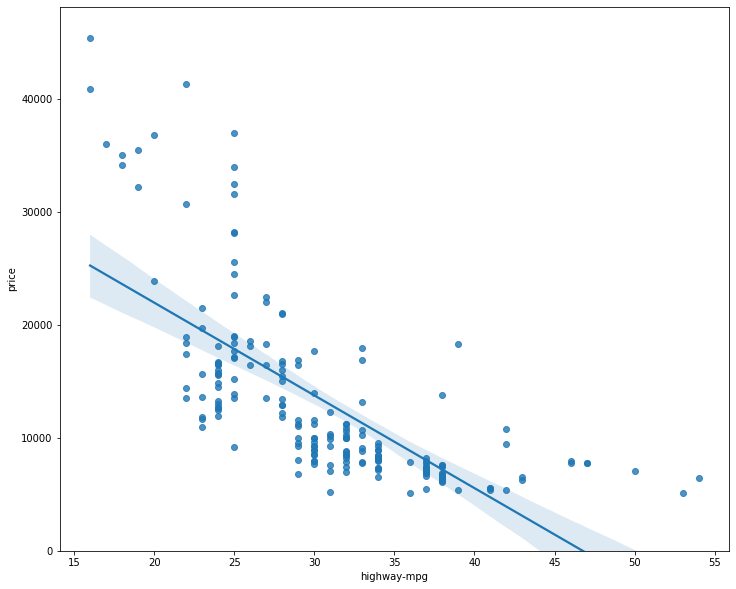

In [268]:
# visualize highway-mpg as a potential predictor of price
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.regplot(x='highway-mpg', y='price', data=df)
plt.ylim(0,)

We can see from this plot that price is negatively correlated to highway-mpg, since the regression slope is negative. One thing to keep in mind when looking at a regression plot is to pay attention to how scattered the data points are around the regression line. This will give you a good indication of the variance of the data, and whether a linear model would be the best fit or not. If the data is too far off from the line, this linear model might not be the best model for this data.

(0, 47414.10667770421)

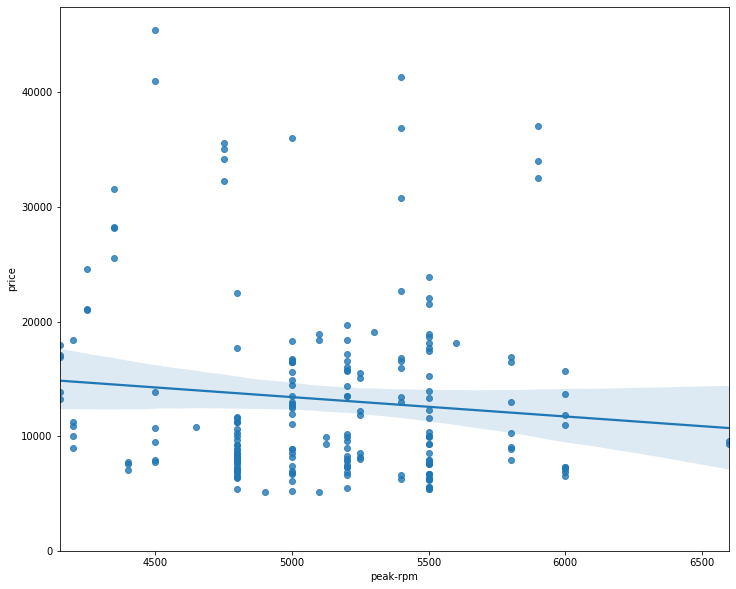

In [269]:
# visualize peak-rpm as a potential predictor of price
plt.figure(figsize=(width, height))
sns.regplot(x='peak-rpm', y='price', data=df)
plt.ylim(0,)

Comparing the regression plot of "peak-rpm" and "highway-mpg" we see that the points for "highway-mpg" are much closer to the generated line and on the average decrease. The points for "peak-rpm" have more spread around the predicted line, and it is much harder to determine if the points are decreasing or increasing as the "highway-mpg" increases.

In [270]:
# find whether peak-rpm or highway-mpg is more strongly correlated with price
df[['peak-rpm', 'highway-mpg', 'price']].corr()

,peak-rpm,highway-mpg,price
peak-rpm,1.000000,-0.058598,-0.101616
highway-mpg,-0.058598,1.000000,-0.704692
price,-0.101616,-0.704692,1.000000


As we can see, highway-mpg is more strongly correlated with price as compared to peak-rpm.

##### Residual Plot to visualize variance of data

The difference between the observed value (y) and the predicted value (Yhat) is called the residual (e). When we look at a regression plot, the residual is the distance from the data point to the fitted regression line.

A residual plot is a graph that shows the residuals on the vertical y-axis and the independent variable on the horizontal x-axis.

We look at the spread of the residuals:  
- If the points in a residual plot are randomly spread out around the x-axis, then a linear model is appropriate for the data.  
- Randomly spread out residuals means that the variance is constant, and thus the linear model is a good fit for this data.

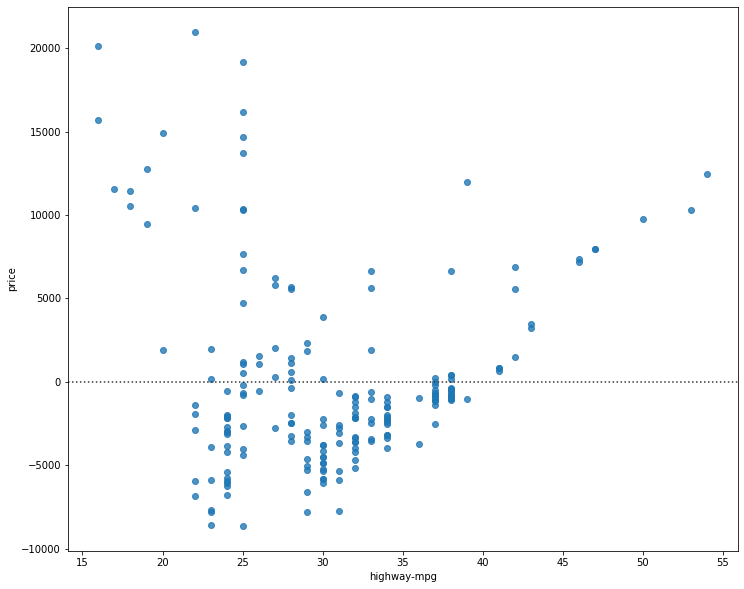

In [271]:
# create a residal plot
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(df['highway-mpg'], df['price'])
plt.show()

We can see from this residual plot that the residuals are not randomly spread around the x-axis, which leads us to believe that maybe a non-linear model is more appropriate for this data.

### Distribution Plot for Multiple Linear Regression
You cannot visualize Multiple Linear Regression with a regression or residual plot.  
One way to look at the fit of the model is by looking at the distribution plot. We can look at the distribution of the fitted values that result from the model and compare it to the distribution of the actual values.

In [272]:
# develop a model using these variables as the predictor variables
Z = df[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']]

In [273]:
# fit the linear model using the above four variables
lm.fit(Z, df['price'])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [274]:
# make a prediction 
Y_hat = lm.predict(Z)

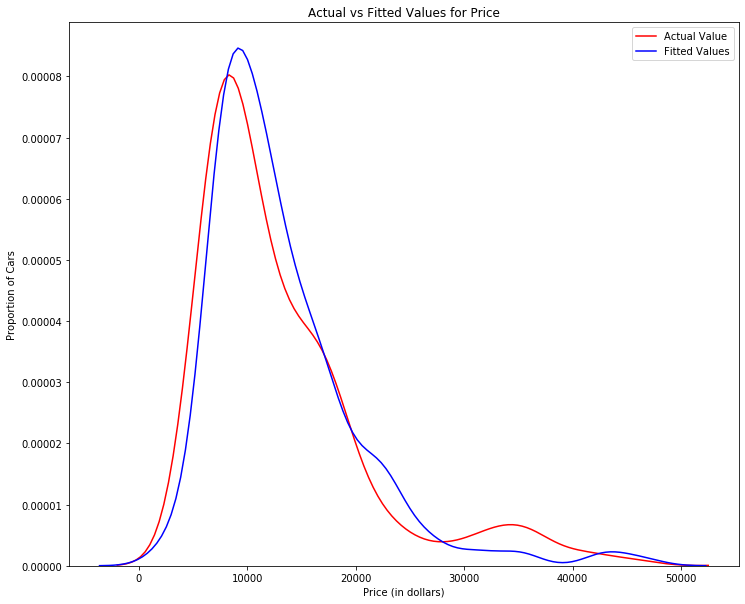

In [275]:
plt.figure(figsize=(width, height))

ax1 = sns.distplot(df['price'], hist=False, color='r', label='Actual Value')
sns.distplot(Yhat, hist=False, color='b', label='Fitted Values', ax=ax1)

plt.title('Actual vs Fitted Values for Price')
plt.xlabel('Price (in dollars)')
plt.ylabel('Proportion of Cars')

plt.show()
plt.close()

We can see that the fitted values are reasonably close to the actual values, since the two distributions overlap a bit. However, there is definitely some room for improvement.

## Polynomial Regression and Pipelines
Polynomial regression is a particular case of the general linear regression model or multiple linear regression models.  
We get non-linear relationships by squaring or setting higher-order terms of the predictor variables.

There are different orders of polynomial regression:  
- Quadratic - 2nd order  
𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋2+𝑏2𝑋2  
- Cubic - 3rd order  
𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋2+𝑏2𝑋2+𝑏3𝑋3  
- Higher order:  
𝑌=𝑎+𝑏1𝑋2+𝑏2𝑋2+𝑏3𝑋3....  

We saw earlier that a linear model did not provide the best fit while using highway-mpg as the predictor variable. Let's see if we can try fitting a polynomial model to the data instead.

In [276]:
# plot the data
def PlotPolly(model, independent_variable, dependent_variable, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variable, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Price ~ Length')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

In [277]:
# get the variables
x = df['highway-mpg']
y = df['price']

In [278]:
# fit the polynomial using the polyfit function
# we use a polynomial of the 3rd order
f = np.polyfit(x, y, 3)

# use the poly1d function to display the polynomial function
p = np.poly1d(f)
print(p)

        3         2
-1.557 x + 204.8 x - 8965 x + 1.379e+05


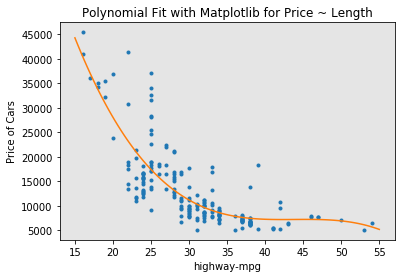

In [279]:
# plot the function
PlotPolly(p, x, y, 'highway-mpg')

In [280]:
np.polyfit(x, y, 3)

array([-1.55663829e+00,  2.04754306e+02, -8.96543312e+03,  1.37923594e+05])

We can already see from plotting that this polynomial model performs better than the linear model. This is because the generated polynomial function "hits" more of the data points.

In [281]:
# create an 11 order polynomial model with the same variables
f1 = np.polyfit(x, y, 11)
p1 = np.poly1d(f1)
print(p1)

            11             10             9           8         7
-1.243e-08 x  + 4.722e-06 x  - 0.0008028 x + 0.08056 x - 5.297 x
          6        5             4             3             2
 + 239.5 x - 7588 x + 1.684e+05 x - 2.565e+06 x + 2.551e+07 x - 1.491e+08 x + 3.879e+08


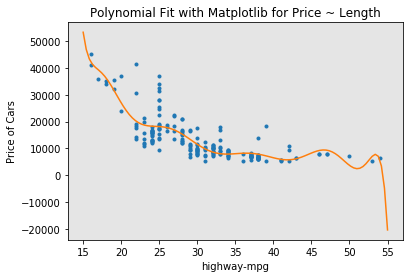

In [282]:
PlotPolly(p1, x, y, 'highway-mpg')

We see that by using very high order polynomials, overfitting is observed.

### Multivariate Polynomial Function
The analytical expression for Multivariate Polynomial function gets complicated. For example, the expression for a second-order (degree=2)polynomial with two variables is given by:

𝑌ℎ𝑎𝑡=𝑎+𝑏1𝑋1+𝑏2𝑋2+𝑏3𝑋1𝑋2+𝑏4𝑋21+𝑏5𝑋22

We will now perform a polynomial transform on multiple features.

In [283]:
# import the module
from sklearn.preprocessing import PolynomialFeatures

In [284]:
# create a PolynomialFeatures object of degree 2
pr = PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [285]:
Z_pr = pr.fit_transform(Z)

In [286]:
Z.shape

(201, 4)

In [287]:
Z_pr.shape

(201, 15)

### Pipeline
Data Pipelines simplify the steps of processing the data.

In [288]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [289]:
# create the pipeline
# create a list of tuples inlcuding the name of the model/estimator and its corresponding constructor
Input = [('scale', StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]

In [290]:
# input the list as an argument to the pipeline constructor
pipe = Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [291]:
# we can normalize the data, perform a transform and fit the model simultaneously
pipe.fit(Z,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [292]:
# we can normalize the data, perform a transform and produced a prediction simultaneously
ypipe = pipe.predict(Z)
ypipe[0:10]

array([13102.74784201, 13102.74784201, 18225.54572197, 10390.29636555,
       16136.29619164, 13880.09787302, 15041.58694037, 15457.93465485,
       17974.49032347, 10510.56542385])

## Measures for In-Sample Evaluation
When evaluating our models, not only do we want to visualize the results, but we also want a quantitative measure to determine how accurate the model is.

Two very important measures that are often used in Statistics to determine the accuracy of a model are:
- R^2 / R-squared
- Mean Squared Error (MSE)

**R-squared:** R squared, also known as the coefficient of determination, is a measure to indicate how close the data is to the fitted regression line. The value of the R-squared is the percentage of variation of the response variable (y) that is explained by a linear model.

**Mean Squared Error (MSE):** The Mean Squared Error measures the average of the squares of errors, that is, the difference between actual value (y) and the estimated value (ŷ).

### Model 1: Simple Linear Regression

In [293]:
X = df[['highway-mpg']]
Y = df['price']
# highway_mpg_fit
lm.fit(X,Y)
# calculate the R^2
print('The R-square is:', lm.score(X,Y))

The R-square is: 0.4965911884339175


We can say that ~ 49.659% of the variation of the price is explained by this simple linear model "highway_mpg_fit".

In [294]:
# predict the output
Yhat = lm.predict(X)
print('The output of the first four predicted values is', Yhat[0:4])

The output of the first four predicted values is [16236.50464347 16236.50464347 17058.23802179 13771.3045085 ]


In [295]:
# import the module
from sklearn.metrics import mean_squared_error
# calculate the MSE
mse = mean_squared_error(df['price'], Yhat)
print('The mean square error of price and predicted value is: ', mse)

The mean square error of price and predicted value is:  31635042.944639895


### Model 2: Multiple Linear Regression 

In [296]:
# fit the model
lm.fit(Z, df['price'])
# find the R^2
print('The R-square value is: ', lm.score(Z, df['price']))

The R-square value is:  0.8093562806577457


We can say that ~ 80.93 % of the variation of price is explained by this multiple linear regression "multi_fit".

In [297]:
# produce a prediction
Y_predict_multifit = lm.predict(Z)

In [298]:
# calcualte MSE
print('The mean square error of price and predicted value using multifit is: ', mean_squared_error(df['price'], Y_predict_multifit))

The mean square error of price and predicted value using multifit is:  11980366.87072649


#### Model 3: Polynomial Fit

In [299]:
# import the module
from sklearn.metrics import r2_score

In [300]:
# calculate R^2
r_squared = r2_score(y, p(x))
print('The R-square value is: ', r_squared)

The R-square value is:  0.674194666390652


We can say that ~ 67.419 % of the variation of price is explained by this polynomial fit.

In [301]:
# calculate MSE
mean_squared_error(df['price'], p(x))

20474146.426361218

## Prediction and Decision Making
#### Prediction  
We trained the model using fit. Now we will use the method 'predict' to produce a prediction.

In [302]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [303]:
# create a new input
new_input = np.arange(1, 100, 1).reshape(-1, 1)

In [304]:
# fit the model
lm.fit(X,Y)
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [305]:
# produce a prediction
yhat = lm.predict(new_input)
yhat[0:5]

array([37601.57247984, 36779.83910151, 35958.10572319, 35136.37234487,
       34314.63896655])

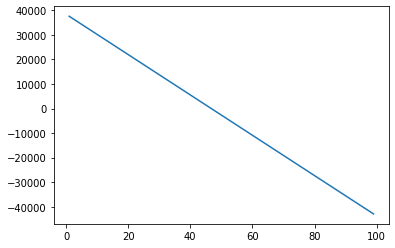

In [306]:
# plot the data
plt.plot(new_input, yhat)
plt.show()

### Decision Making: Determing a Good Model Fit
Now that we have visualized the different models, and generated the R-squared and MSE values for the fits, how do we determine a good model fit?

What is a good R-squared value?
When comparing models, the model with the higher R-squared value is a better fit for the data.

What is a good MSE?
When comparing models, the model with the smallest MSE value is a better fit for the data.

#### Let's take a look at the values for the different models. 

Simple Linear Regression: Using Highway-mpg as a Predictor Variable of Price.
- R-squared: 0.49659118843391759
- MSE: 3.16 x10^7

Multiple Linear Regression: Using Horsepower, Curb-weight, Engine-size, and Highway-mpg as Predictor Variables of Price.  
- R-squared: 0.80896354913783497
- MSE: 1.2 x10^7

Polynomial Fit: Using Highway-mpg as a Predictor Variable of Price.  
- R-squared: 0.6741946663906514
- MSE: 2.05 x 10^7

#### Simple Linear Regression model (SLR) vs Multiple Linear Regression model (MLR)
Usually, the more variables you have, the better your model is at predicting, but this is not always true. Sometimes you may not have enough data, you may run into numerical problems, or many of the variables may not be useful and or even act as noise. As a result, you should always check the MSE and R^2.  
So to be able to compare the results of the MLR vs SLR models, we look at a combination of both the R-squared and MSE to make the best conclusion about the fit of the model.

- **MSE:** The MSE of SLR is 3.16x10^7 while MLR has an MSE of 1.2 x10^7. The MSE of MLR is much smaller.  
- **R-squared:** In this case, we can also see that there is a big difference between the R-squared of the SLR and the R-squared of the MLR. The R-squared for the SLR (0.497) is very small compared to the R-squared for the MLR (0.809).  
This R-squared in combination with the MSE show that MLR seems like the better model fit in this case, compared to SLR.

#### Simple Linear Model (SLR) vs Polynomial Fit
- **MSE:** We can see that Polynomial Fit brought down the MSE, since this MSE is smaller than the one from the SLR.
- **R-squared:** The R-squared for the Polyfit is larger than the R-squared for the SLR, so the Polynomial Fit also brought up the R-squared quite a bit.  
Since the Polynomial Fit resulted in a lower MSE and a higher R-squared, we can conclude that this was a better fit model than the simple linear regression for predicting Price with Highway-mpg as a predictor variable.

#### Multiple Linear Regression (MLR) vs Polynomial Fit
- **MSE:** The MSE for the MLR is smaller than the MSE for the Polynomial Fit.
- **R-squared:** The R-squared for the MLR is also much larger than for the Polynomial Fit.

#### Conclusion:
Comparing these three models, we conclude that **the MLR model is the best model** to be able to predict price from our dataset. This result makes sense, since we have 27 variables in total, and we know that more than one of those variables are potential predictors of the final car price.

## Model Evaluation and Refinement
We have built models and made predictions of vehicle prices. Now we will determine how accurate these predictions are.

In [307]:
import pandas as pd
import numpy as np

In [308]:
path = 'https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DA0101EN/module_5_auto.csv'
df = pd.read_csv(path)

In [309]:
# first let's only use numeric data
df = df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


In [310]:
# import the modules
from IPython.display import display
from IPython.html import widgets
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

C:\Users\prana\Anaconda3\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


#### Functions for Plotting

In [311]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
  width = 12
  height = 10
  plt.figure(figsize=(width, height))

  ax1 = sns.distplot(RedFunction, hist=False, color='r', label=RedName)
  ax2 = sns.distplot(BlueFunction, hist=False, color='b', label=BlueName, ax=ax1)

  plt.title(Title)
  plt.xlabel('Price (in dollars)')
  plt.ylabel('Proportion of Cars')

  plt.show()
  plt.close()

In [312]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
  #training data 
  #testing data 
  # lr:linear regression object     #poly_transform:polynomial transformation object 
  width = 12
  height = 10    
  plt.figure(figsize=(width, height))
 
  xmax=max([xtrain.values.max(), xtest.values.max()])
  xmin=min([xtrain.values.min(), xtest.values.min()])
  x=np.arange(xmin, xmax, 0.1)

  plt.plot(xtrain, y_train, 'ro', label='Training Data')
  plt.plot(xtest, y_test, 'go', label='Test Data')
  plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
  plt.ylim([-10000, 60000])
  plt.ylabel('Price')
  plt.legend()

### Training and Testing

In [313]:
# place target data 'price' in a seaparate dataframe y
y_data = df['price']

In [314]:
# drop price data in x_data
x_data = df.drop('price', axis=1)

In [315]:
# randomly split the data into training and testing data using the function train_test_split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.1, random_state=1)
# test_size setes the proportion of data that is split. The testing set is set to 10% of the total dataset.
# use the same random_state value throughout your code

print('number of test samples: ', x_test.shape[0])
print('number of training samples: ', x_train.shape[0])

number of test samples:  21
number of training samples:  180


In [316]:
# import LinearRegression module
from sklearn.linear_model import LinearRegression

# create Linear Regression object
lre = LinearRegression()

# fit the model using the feature 'horsepower'
lre.fit(x_train[['horsepower']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [317]:
# calculate R^2 on the test data
lre.score(x_test[['horsepower']], y_test)

0.3635875575078824

In [318]:
# calcuate R^2 on the training data
lre.score(x_train[['horsepower']], y_train)

0.6619724197515103

We can see that the R^2 is much smaller using the test data.

### Cross-Validation Score

In [319]:
# import the module
from sklearn.model_selection import cross_val_score

In [320]:
# input the object(lre), the feature(horsepower), the target data(y_data), number of folds(cv)
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

The default scoring is R^2. Each element in the array has the average R^2 value in the fold.

In [321]:
# calculate the average and standard deviation of our estimate
print('The mean of the folds is', Rcross.mean(), 'and the standard deviation is', Rcross.std())

The mean of the folds is 0.522009915042119 and the standard deviation is 0.2911839444756029


We can use negative squared error as a score by setting the parameter 'scoring' metric to 'neg_mean_squared_error'.

In [322]:
-1 * cross_val_score(lre, x_data[['horsepower']], y_data, cv=4, scoring='neg_mean_squared_error')

array([20254142.84026704, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

Use the function 'cross_val_predict' to predict the output. The function splits up the data into the specified number of folds, using one fold to get a prediction while the rest of the folds are used as test data. First import the function.

In [323]:
from sklearn.model_selection import cross_val_predict
yhat= cross_val_predict(lre, x_data[['horsepower']], y_data, cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

### Overfitting, Underfitting and Model Selection
It turns out that the test data sometimes referred to as the out of sample data is a much better measure of how well your model performs in the real world. One reason for this is overfitting; let's go over some examples. It turns out these differences are more apparent in Multiple Linear Regression and Polynomial Regression so we will explore overfitting in that context.

In [324]:
# create MLR objects and train the model
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [325]:
# prediction using training data
y_hat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
y_hat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [326]:
# prediction using test data
y_hat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
y_hat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

Lets perform some model evaluation using our training and testing data separately.

In [327]:
# import seaborn and matplotlib libraries
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

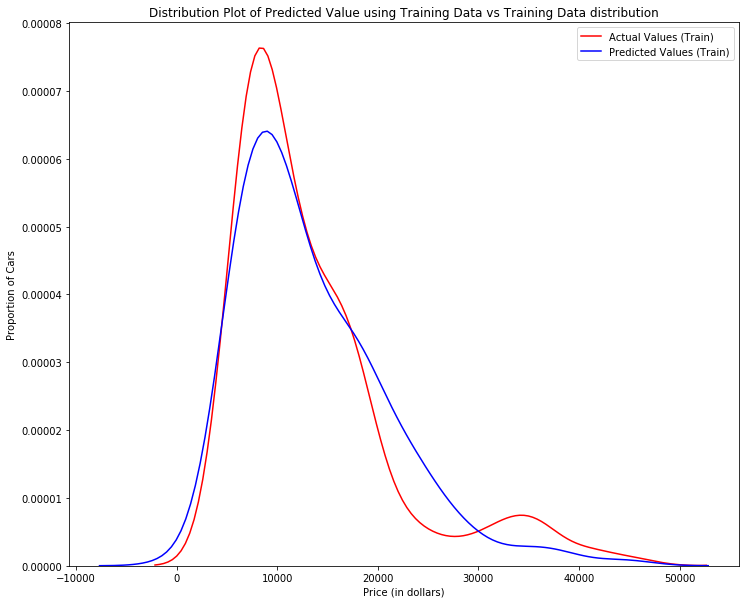

In [328]:
# examine the distribution of the predicted values of the training data
Title = 'Distribution Plot of Predicted Value using Training Data vs Training Data distribution'
DistributionPlot(y_train, y_hat_train, 'Actual Values (Train)', 'Predicted Values (Train)', Title)

Figure 1: Plot of predicted values using the training data compared to the training data. 

So far the model seems to be doing well in learning from the training dataset. But what happens when the model encounters new data from the testing dataset?

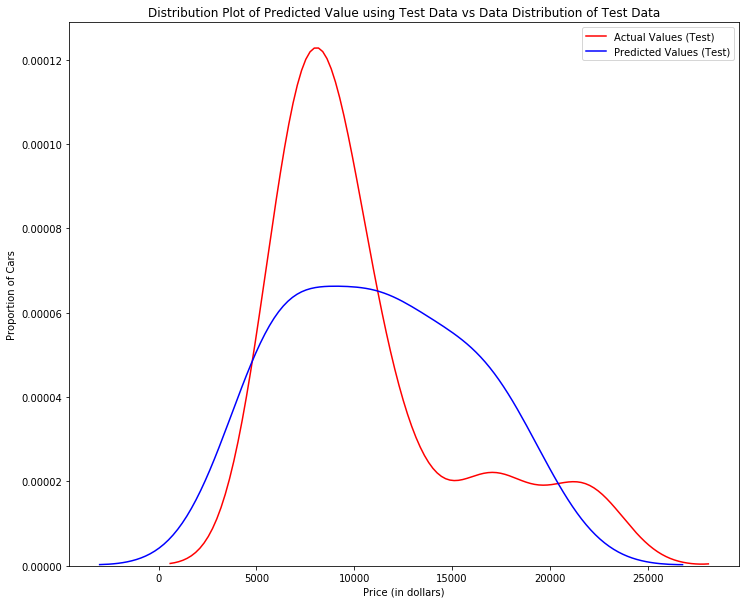

In [329]:
# examine the distribution of the predicted values of the test data
Title = 'Distribution Plot of Predicted Value using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test, y_hat_test, 'Actual Values (Test)', 'Predicted Values (Test)', Title)

Figure 2: Plot of predicted value using the test data compared to the test data. 

When the model generates new values from the test data, we see the distribution of the predicted values is much different from the actual target values.  
Comparing Figure 1 and Figure 2, it is evident the distribution of the training data in Figure 1 is much better at fitting the data. This difference in Figure 2 is apparent where the ranges are from 5000 to 15000. This is where the distribution shape is exceptionally different.

Let's see if polynomial regression also exhibits a drop in the prediction accuracy when analysing the test dataset.

In [330]:
from sklearn.preprocessing import PolynomialFeatures

### Overfitting
Overfitting occurs when the model fits the noise, not the underlying process. Therefore when testing your model using the test-set, your model does not perform as well as it is modelling noise, not the underlying process that generated the relationship.

In [331]:
# use 45% of the data for testing and the rest for training
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [332]:
# perform a degree 5 polynomial transformation on the feature 'horsepower'
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [333]:
# create a linear regression model 
poly = LinearRegression()

# train the model
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [334]:
# see the output of the model using predict
y_hat = poly.predict(x_test_pr)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

In [335]:
# take the first five predicted values and compare it to the actual targets
print('Predicted values:', yhat[0:4])
print('True values', y_test[0:4].values)

Predicted values: [14141.63807508 14141.63807508 20814.29423473 12745.03562306]
True values [ 6295. 10698. 13860. 13499.]


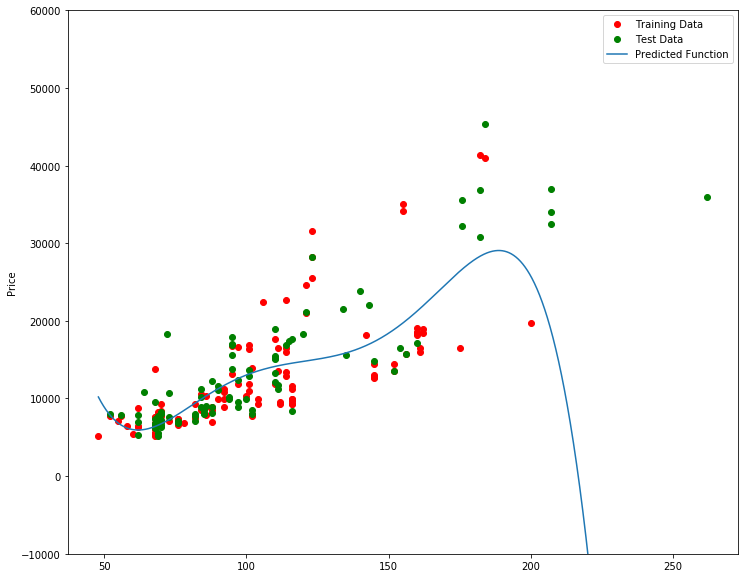

In [336]:
# display the plot
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly, pr)

Figure 3: A polynomial regression model; red dots represent training data, green dots represent test data, and the blue line represents the model prediction. 

We see that the estimated function appears to track the data but around 200 horsepower, the function begins to diverge from the data points.

In [337]:
# R^2 of training data
poly.score(x_train_pr, y_train)

0.5567716902635091

In [338]:
# R^2 of test data
poly.score(x_test_pr, y_test)

-29.87141885918752

We see the R^2 for the training data is 0.5567 while the R^2 on the test data was -29.87. The lower the R^2, the worse the model, a Negative R^2 is a sign of overfitting.

Let's see how the R^2 changes on the test data for different order polynomials and plot the results.

Text(3, 0.75, 'Maximum R^2 ')

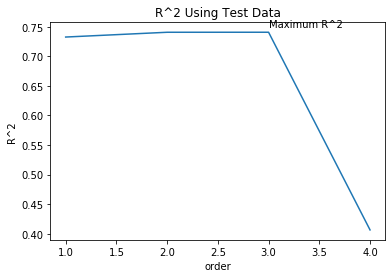

In [339]:
Rsqu_test = []
order = [1, 2, 3, 4]
for n in order:
  pr = PolynomialFeatures(degree=n)
  x_train_pr = pr.fit_transform(x_train[['horsepower']])
  x_test_pr = pr.fit_transform(x_test[['horsepower']])    
  lr.fit(x_train_pr, y_train)
  Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

We see the R^2 gradually increases until an order three polynomial is used. Then the R^2 dramatically decreases at four.

In [340]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

The following interface allows you to experiment with different polynomial orders and different amounts of data. 

In [341]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

### Ridge Regression
Review Ridge Regression, see how the parameter Alpha changes the model. Our test data will be used as validation data.

In [342]:
# perform a degree 2 polynomial transformation on our data
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg', 'normalized-losses', 'symboling']])
x_test_pr = pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [343]:
# import Ridge from the module
from sklearn.linear_model import Ridge

In [344]:
# Create a Ridge Regression object, setting the regularization parameter to 0.1
RidgeModel = Ridge(alpha=0.1)

In [345]:
# fit the model
RidgeModel.fit(x_train_pr, y_train)

C:\Users\prana\Anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:148: LinAlgWarning: Ill-conditioned matrix (rcond=1.02972e-16): result may not be accurate.
  overwrite_a=True).T


Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [346]:
# get the prediction
yhat = RidgeModel.predict(x_test_pr)

In [347]:
# Compare the first 5 predicted samples to our test set
print('predicted:', yhat[0:4])
print('test set:', y_test[0:4].values)

predicted: [ 6567.83081933  9597.97151399 20836.22326843 19347.69543463]
test set: [ 6295. 10698. 13860. 13499.]


Select the value of Alpha that minimizes the test error. For e.g., we can use a loop.

In [348]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALPHA = 10 * np.array(range(0,1000))
for alfa in ALPHA:
    RigeModel = Ridge(alpha=alfa) 
    RigeModel.fit(x_train_pr, y_train)
    Rsqu_test.append(RigeModel.score(x_test_pr, y_test))
    Rsqu_train.append(RigeModel.score(x_train_pr, y_train))

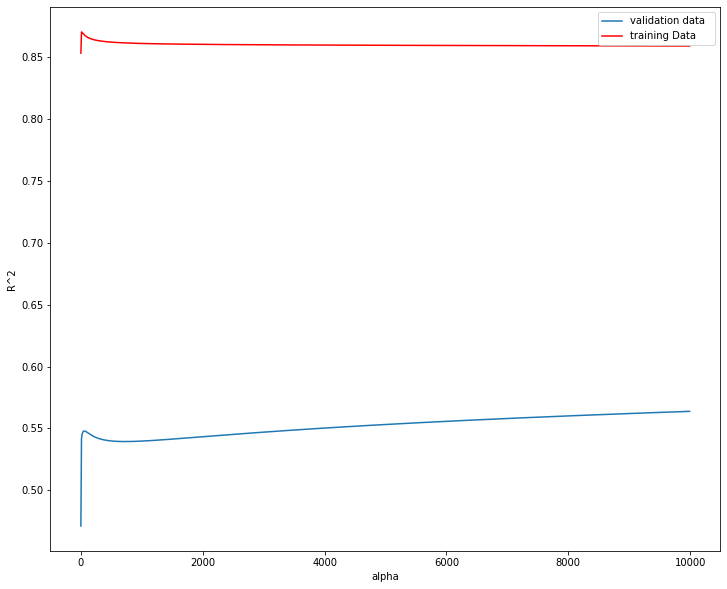

In [349]:
# Plot the value of R^2 for different Alphas
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALPHA,Rsqu_test, label='validation data  ')
plt.plot(ALPHA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Figure 6: The blue line represents the R^2 of the test data, and the red line represents the R^2 of the training data. The x-axis represents the different values of Alpha. 

### Grid Search
The term Alpha is a hyperparameter; sklearn has the class GridSearchCV to make the process of finding the best hyperparameter simpler.

In [350]:
# import GridSearchCV from the module model_selection
from sklearn.model_selection import GridSearchCV

In [351]:
# create a dictionary of parameter values
parameters1 = [{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000]}]

In [352]:
# create a Ridge regions object
RR = Ridge()
RR

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [353]:
# create a ridge grid seacrch object
Grid1 = GridSearchCV(RR, parameters1, cv=4)

In [354]:
# Fit the model
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000,
                                    100000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

The object finds the best parameter values on the validation data. We can obtain the estimator with the best parameters and assign it to the variable BestRR.

In [355]:
BestRR = Grid1.best_estimator_
BestRR

Ridge(alpha=10000, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [356]:
# test our model on the test data
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036149

In [359]:
# Perform a grid search for the alpha parameter and the normalization parameter, then find the best values of the parameters 
parameters2= [{'alpha': [0.001,0.1,1, 10, 100, 1000,10000,100000,100000],'normalize':[True,False]} ]
Grid2 = GridSearchCV(Ridge(), parameters2,cv=4)
Grid2.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']],y_data)
Grid2.best_estimator_

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)